
*   RoBERTa(Robustly Optimized BERT-Pretraining Approach)
*   BERT(Bidirectional Encoder Representations from Transformers)

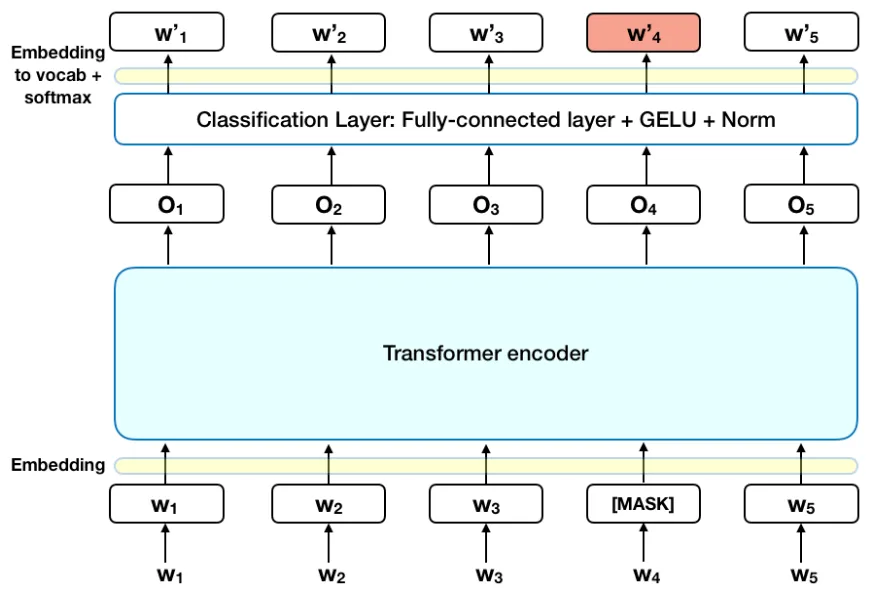

Demo Source: https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment

In [1]:
!pip install transformers==3.0.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import numpy as np
from scipy.special import softmax

In [3]:
task='sentiment'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"
tokenizer = AutoTokenizer.from_pretrained(MODEL)

In [4]:
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


**Labels**: 

*   0 -> Negative
*   1 -> Neutral
*   2 -> Positive



In [6]:
text = "This is an example of a happy tweet!"
# text = "'This is an example of a happy 😁 👍 ❤️ tweet!"
# text = '😁 👍 ❤️'
encoded_input = tokenizer(text, return_tensors='pt')
output = model(**encoded_input)
scores = output[0][0].detach().numpy() 
scores = softmax(scores)
scores

array([0.00165876, 0.02229331, 0.976048  ], dtype=float32)

### Compare RoBERTa and TextBlob

In [7]:
from textblob import TextBlob

In [8]:
# Wrap this **particular** RoBERTa sentiment model into a function ONLY for illustration purpose:

LABELS = {0:'Negative', 1:'Neutral', 2:'Positive'}

def roberta_sentiment(text):
  print(f'Content: {text}')
  encoded_input = tokenizer(text, return_tensors='pt')
  output = model(**encoded_input)
  scores = output[0][0].detach().numpy() 
  scores = softmax(scores)
  for i in LABELS:
    print(f'{LABELS[i]}: {scores[i]}')
  # return scores

In [9]:
text1 = 'The food was amazing'
text2 = 'The food was AMAZING'
for txt in (text1, text2):
  roberta_sentiment(txt)
  print('-----')

Content: The food was amazing
Negative: 0.003502874169498682
Neutral: 0.01738031767308712
Positive: 0.9791167974472046
-----
Content: The food was AMAZING
Negative: 0.003025100799277425
Neutral: 0.013169758953154087
Positive: 0.983805239200592
-----


In [10]:
for txt in (text1, text2):
  blob = TextBlob(text)
  print(blob.sentiment)

Sentiment(polarity=1.0, subjectivity=1.0)
Sentiment(polarity=1.0, subjectivity=1.0)


#### Let's test more on different sentences! 

In [11]:
# on restaurant reviews
text = 'we received our food in under ten minutes.' # Original sentence: The server was really helpful and we received our food in under ten minutes.

In [ ]:
text = 'And service was definitely 5 star'

In [218]:
text = 'this is not too bad'

In [193]:
text = "Whenever I'm back in town and in the mood for some dumplings, this place is my go-to."

In [196]:
text = 'Huge portions for a great price, but the service was slow, painfully so'

In [12]:
roberta_sentiment(text)

Content: we received our food in under ten minutes.
Negative: 0.005969495978206396
Neutral: 0.3825729191303253
Positive: 0.6114576458930969


In [13]:
blob = TextBlob(text)
print(blob.sentiment.polarity)

0.0
